# Logistic Regression Exercise 1
In  this  part  of  the  exercise,  you  will  build  a  logistic  regression  model  topredict whether a student gets admitted into a university.Suppose that you are the administrator of a university department andyou want to determine each applicant’s chance of admission based on theirresults  on  two  exams.   You  have  historical  data  from  previous  applicantsthat you can use as a training set for logistic regression.  For each trainingexample, you have the applicant’s scores on two exams and the admissionsdecision.Your task is to build a classification model that estimates an applicant’sprobability of admission based the scores from those two exams. 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('ex2data1.txt',header=None)
data.columns=['Exam1','Exam2','isAdmitted']
data


,Exam1,Exam2,isAdmitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [4]:
admitted=data[data['isAdmitted'] == 1]
admitted

,Exam1,Exam2,isAdmitted
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1
12,82.307053,76.481963,1
13,69.364589,97.718692,1
15,53.971052,89.207350,1
16,69.070144,52.740470,1


In [5]:
un_admitted=data[data['isAdmitted']==0]
un_admitted

,Exam1,Exam2,isAdmitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
5,45.083277,56.316372,0
10,95.861555,38.225278,0
11,75.013658,30.603263,0
14,39.538339,76.036811,0
17,67.946855,46.678574,0
20,67.372028,42.838438,0
22,50.534788,48.855812,0


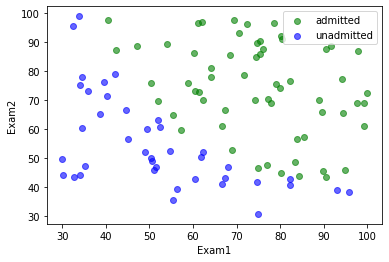

In [11]:
admitted_x=admitted['Exam1']
admitted_y=admitted['Exam2']
unadmitted_x=un_admitted['Exam1']
unadmitted_y=un_admitted['Exam2']

plt.xlabel('Exam1')
plt.ylabel('Exam2')

plt.scatter(admitted_x,admitted_y,alpha=0.6,c='green')
plt.scatter(unadmitted_x,unadmitted_y,alpha=0.6,c='blue')
plt.legend(['admitted','unadmitted'])
plt.show()



In [99]:
y=data.iloc[:,data.shape[1]-1:data.shape[1]]
y=np.array(y.values)
y

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [92]:
x=data.iloc[:,0:2]
x.insert(0,'x0',1)
x.columns=['x0','x1','x2']
x=np.array(x.values)
x

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644],
       [ 1.        , 45.08327748, 56.31637178],
       [ 1.        , 61.10666454, 96.51142588],
       [ 1.        , 75.02474557, 46.55401354],
       [ 1.        , 76.0987867 , 87.42056972],
       [ 1.        , 84.43281996, 43.53339331],
       [ 1.        , 95.86155507, 38.22527806],
       [ 1.        , 75.01365839, 30.60326323],
       [ 1.        , 82.30705337, 76.4819633 ],
       [ 1.        , 69.36458876, 97.71869196],
       [ 1.        , 39.53833914, 76.03681085],
       [ 1.        , 53.97105215, 89.20735014],
       [ 1.        , 69.07014406, 52.74046973],
       [ 1.        , 67.94685548, 46.67857411],
       [ 1.        , 70.66150955, 92.92713789],
       [ 1.        , 76.97878373, 47.57596365],
       [ 1.        , 67.37202755, 42.838

In [168]:
n=x.shape[1]
m=x.shape[0]
iteration=1000000
alpha=0.002
costs=np.zeros(iteration+1)
theta=np.zeros(n)

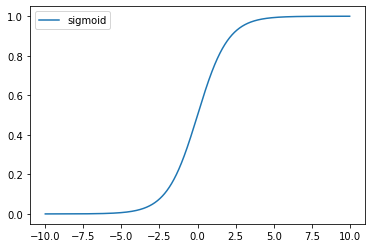

In [116]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def cost(_theta,_x,_y):
    res=0
    _theta=np.matrix(_theta)
    _x=np.matrix(_x)
    _y=np.matrix(_y)
    first=np.multiply(-y,np.log(sigmoid(_x*_theta.T)))
    second=np.multiply((1-y),np.log(1-sigmoid(_x*_theta.T)))
    return np.sum(first-second)/m


num_x=np.arange(-10,10,0.01)
num_y=sigmoid(num_x)

plt.plot(num_x,num_y,label='sigmoid')
plt.legend()
plt.show()


$$
    J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}\log(h_{\theta}(x^{(i)}))+(1-y^{(i)})\log(1-h_{\theta}(x^{(i)}))]
$$

In [100]:
x.shape,theta.shape,y.shape

((100, 3), (3,), (100, 1))

In [123]:
costs[0]=cost(theta,x,y)
costs[0]

0.6931471805599453

# Batch Gradient Descent
$$
    \theta_j:=\theta_j-\alpha\cdot \frac{\partial J(\theta)}{\partial\theta_j}\\ \Rightarrow \theta_j:=\theta_j-\alpha\cdot\frac{1}{m}\cdot \sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}_j 
$$

In [169]:
alpha,n,iteration

(0.002, 3, 1000000)

In [170]:
def gradient_descent(_theta,_x,_y):
    _theta=np.matrix(_theta)
    _x=np.matrix(_x)
    _y=np.matrix(_y)

    temp=np.matrix(np.zeros(n))

    for i in range(iteration):
        for j in range(n):
            temp[0,j]=_theta[0,j]-(alpha/m)*np.sum(np.multiply(sigmoid(_x*_theta.T)-_y,_x[:,j]))
        _theta=temp
        costs[i+1]=cost(_theta,_x,_y)
        print(f'i={i},cost={costs[i + 1]},theta={_theta}') 
    return _theta

theta=gradient_descent(theta,x,y)
theta


0.21041424540876563,theta=[[-19.08429895   0.15767623   0.15228413]]
i=999759,cost=0.21041423220441996,theta=[[-19.08430409   0.15767627   0.15228417]]
i=999760,cost=0.21041421900010548,theta=[[-19.08430923   0.15767631   0.15228421]]
i=999761,cost=0.21041420579582226,theta=[[-19.08431437   0.15767635   0.15228425]]
i=999762,cost=0.21041419259157026,theta=[[-19.08431951   0.15767639   0.15228429]]
i=999763,cost=0.21041417938734955,theta=[[-19.08432465   0.15767643   0.15228434]]
i=999764,cost=0.21041416618316014,theta=[[-19.08432979   0.15767647   0.15228438]]
i=999765,cost=0.21041415297900185,theta=[[-19.08433493   0.15767651   0.15228442]]
i=999766,cost=0.21041413977487497,theta=[[-19.08434007   0.15767655   0.15228446]]
i=999767,cost=0.21041412657077926,theta=[[-19.08434521   0.1576766    0.1522845 ]]
i=999768,cost=0.21041411336671484,theta=[[-19.08435034   0.15767664   0.15228454]]
i=999769,cost=0.21041410016268164,theta=[[-19.08435548   0.15767668   0.15228459]]
i=999770,cost=0.21

matrix([[-19.08553726,   0.15768611,   0.15229415]])

In [171]:
theta,cost(theta,x,y)

(matrix([[-19.08553726,   0.15768611,   0.15229415]]), 0.21041106406509852)

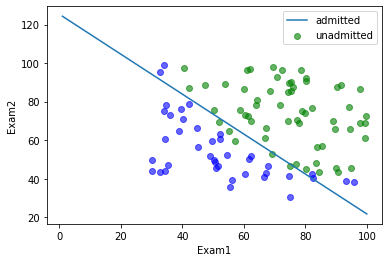

In [172]:
admitted_x=admitted['Exam1']
admitted_y=admitted['Exam2']
unadmitted_x=un_admitted['Exam1']
unadmitted_y=un_admitted['Exam2']
x_list=np.arange(1,100,0.01)
y_list=(theta[0,0]+theta[0,1]*x_list)/(-theta[0,2])

plt.xlabel('Exam1')
plt.ylabel('Exam2')

plt.scatter(admitted_x,admitted_y,alpha=0.6,c='green')
plt.scatter(unadmitted_x,unadmitted_y,alpha=0.6,c='blue')
plt.plot(x_list,y_list)
plt.legend(['admitted','unadmitted'])
plt.show()

In [182]:
def predict(_theta,_x,_y):
    correct=0
    _theta=np.matrix(_theta)
    for i in range(m):
        data_x=_x[i,:]
        data_x=np.matrix(data_x)
        prob=sigmoid(data_x*_theta.T)
        res=1 if prob>=0.5  else 0
        if(res==_y[i,:]):
            correct=correct+1
    return correct/m
predict(theta,x,y)

0.89